### Neshyba & Deloya Garcia, 2025

# ClimateStats

## Overview
The idea of this module is to develop your skill and insights into the statistical analysis of weather records that lead to climate. The weather data we'll be accessing is archived at the NOAA website, https://gml.noaa.gov/dv/data/index.php?category=Meteorology&frequency=Hourly%2BAverages. We'll focus (as the name suggests) on statistics of _hourly_ measurements of key weather variables, including temperature, wind speed, wind direction. 

The main computing resource we'll be using to look at these data is the data management tool *pandas* to organize data and metadata associated with carbon emissions over time. We'll be using *pandas* a little more here than previously, in that we'll be using it to search for flags that indicate missing or bad data. 

In term of climate literacy, the important lesson here is the idea that climate science is a statistical science, specifically the statistics of weather, and therefore we would expect that statistical evidence of climate change would be most pronounced in polar regions.   


## Learning goals
1. I can find and interpret metadata for NOAA weather records.
1. I can use *pandas* to read in tables of data as dataframes, implement quality-control measures, and combine dataframes.
1. I can compute a probability density from a time series of measurements.

In [2]:
# Get some resources
import numpy as np
import matplotlib.pyplot as plt; plt.rc("figure", figsize=(12,8))
import pandas as pd

### Interpreting metadata
It's often useful to inspect metadata associated with a data set before diving in. A good way to start out this module is to just go to the NOAA website and look around! Locate the "i" icons on the right-hand side, and find  answers to the following questions:

1. The three-letter _region code_ tells you where the data were collected. What does "BRW" stand for?
1. The _units_ of numerical data are specified in there somewhere. What are the units of temperature? Of wind speed?
1. _flags_ let you know if data are missing. For the NOAA dataset, these flags all look something like "-99.9", but specfics vary. What's the flag for missing temperature?

Enter your answers in the cell below.

### BEGIN SOLUTION

1. BRW stands for Barrow
1. Units are degrees C for temperature. For wind speed, m/s
1. The flag for missing temperature is -999.9

### END SOLUTION

### Loading (and plotting) time series of hourly temperature data, using Pandas
Next, we'll collect some data for a recent year from the NOAA website, as a *pandas dataframe*. Execute the cell below and have a look at the output.

,station,year,month,day,hour,winddirection,windspeed,temperature
0,BRW,2024,1,1,0,45,5.2,-27.9
1,BRW,2024,1,1,1,48,5.1,-28.7
2,BRW,2024,1,1,2,50,5.5,-28.0
3,BRW,2024,1,1,3,54,5.3,-28.6
4,BRW,2024,1,1,4,51,5.4,-28.8
...,...,...,...,...,...,...,...,...
8718,BRW,2024,12,31,19,59,7.9,-24.7
8719,BRW,2024,12,31,20,59,7.2,-24.7
8720,BRW,2024,12,31,21,58,7.3,-24.6
8721,BRW,2024,12,31,22,57,7.4,-24.4


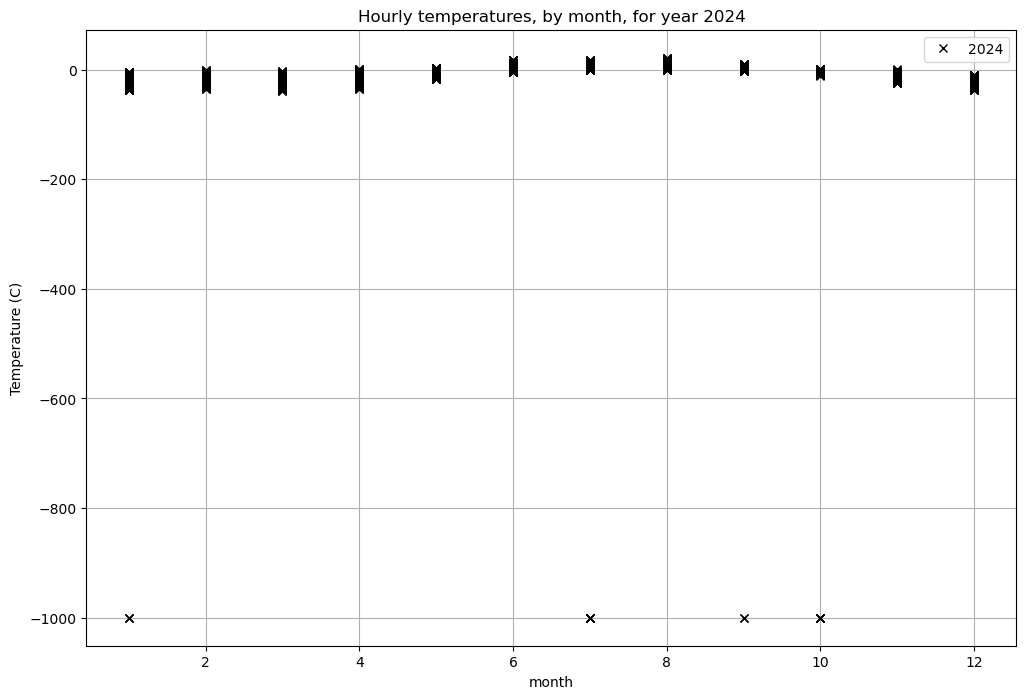

In [6]:
# Load the 2024 data
df2024 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2024.txt',
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,4,5,6,9],
                        names=['station','year','month','day','hour','winddirection','windspeed','temperature']) 

# Print some information about the dataframe
display(df2024)

# Plotting the temperatures as a function of month
plt.figure()
plt.plot(df2024['month'], df2024['temperature'], 'kx', label='2024')
plt.xlabel('month')
plt.ylabel('Temperature (C)')
plt.title('Hourly temperatures, by month, for year 2024')
plt.grid()
plt.legend()

### Pause for analysis
Take a close look at this graph. You'll probably notice some absurdly low "temperatures", close to -1000 degrees! Don't be alarmed -- this is not https://en.wikipedia.org/wiki/The_Day_After_Tomorrow. Those values are flags that mark the data as being bad or missing. This is a quality-control issue that we'll attend to in a bit, but in the meantime we'll practice getting other data.

In the cell below, do the same, but for data from the year 1977 (load, display, and plot).

,station,year,month,day,hour,winddirection,windspeed,temperature
0,BRW,1977,1,1,0,72,6.3,-20.1
1,BRW,1977,1,1,1,72,6.3,-20.3
2,BRW,1977,1,1,2,70,6.7,-20.5
3,BRW,1977,1,1,3,76,6.7,-20.5
4,BRW,1977,1,1,4,73,6.7,-20.4
...,...,...,...,...,...,...,...,...
8755,BRW,1977,12,31,19,145,3.6,-16.4
8756,BRW,1977,12,31,20,66,1.3,-14.9
8757,BRW,1977,12,31,21,75,2.2,-15.6
8758,BRW,1977,12,31,22,161,6.7,-17.3


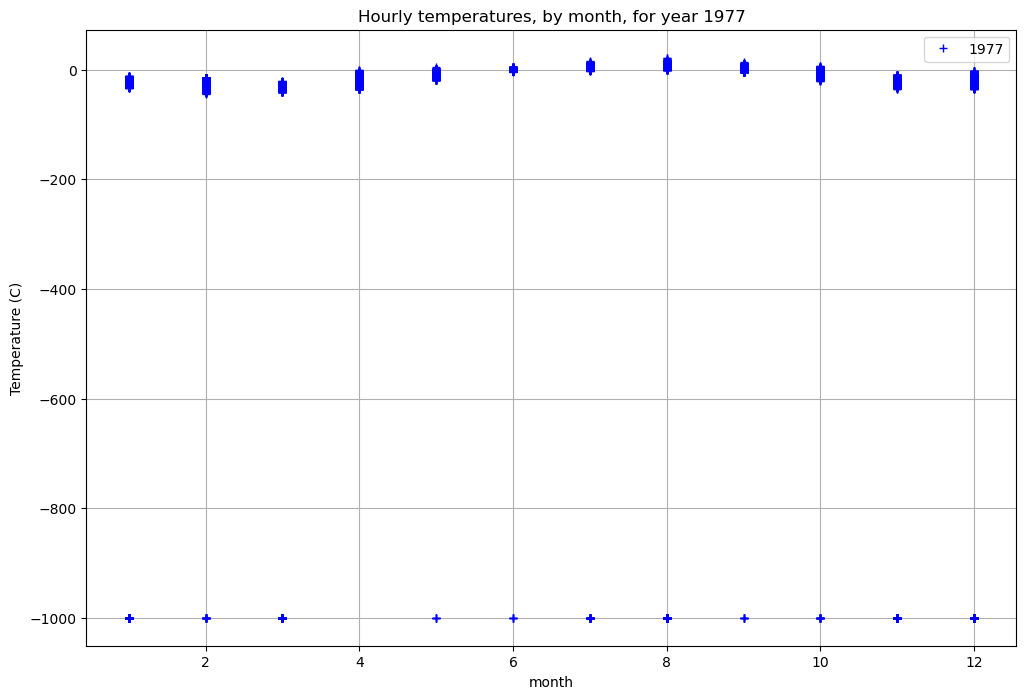

In [8]:
### BEGIN SOLUTION
df1977 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_1977.txt',
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,4,5,6,9],
                        names=['station','year','month','day','hour','winddirection','windspeed','temperature']) 

# Print some information about the dataframe
display(df1977)

# Plot the temperatures as a function of month
plt.figure()
plt.plot(df1977['month'], df1977['temperature'], 'b+', label='1977')
plt.xlabel('month')
plt.ylabel('Temperature (C)')
plt.title('Hourly temperatures, by month, for year 1977')
plt.legend()
plt.grid()
### END SOLUTION

### Quality control
The code below directs *pandas* to look at each row of the 2024 temperature dataframe, and if the temperature is -999.9, it records the index of that row, in a list called "badindices". The next line of code is a very cool Pandas functionality: it drops (gets rid of) those indices from the dataframe! Afterward, we re-plot the data, without the bad data.

By the way, if you execute this cell twice, you'll see that the second time it says it isn't dropping any points -- because (as I'm sure you've guessed) it got all the bad data the first time.

I am dropping this many missing data points:  103


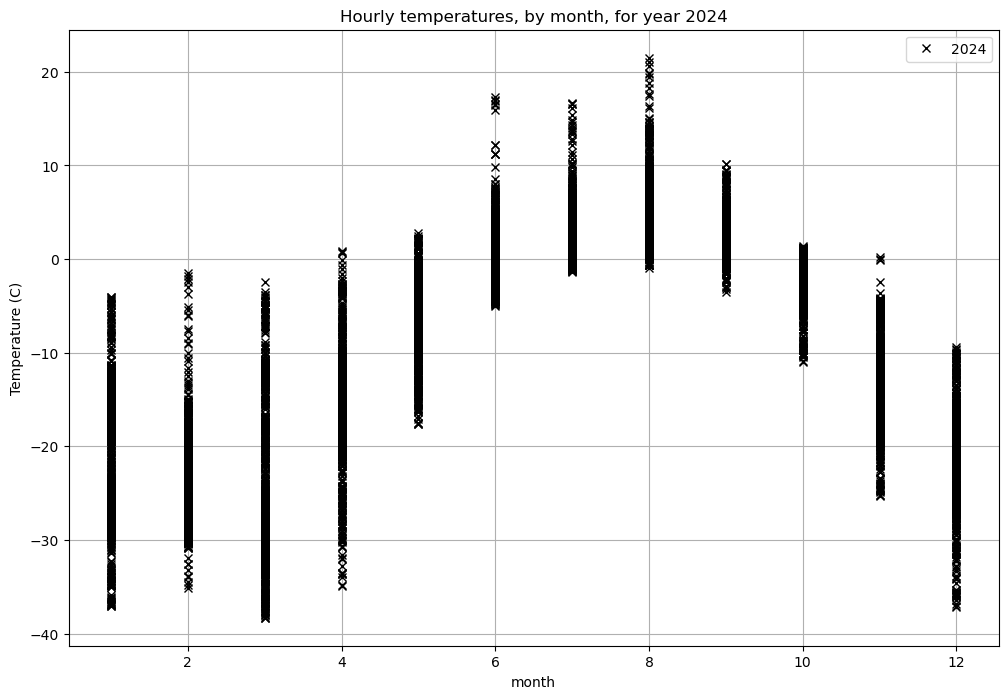

In [10]:
# Find bad temperatures
badindices = df2024[ df2024['temperature'] == -999.9 ].index
print('I am dropping this many missing data points: ', len(badindices))
df2024.drop(badindices,inplace=True)

# Plot
plt.figure()
plt.plot(df2024['month'],df2024['temperature'], 'kx', label='2024')
plt.xlabel('month')
plt.ylabel('Temperature (C)')
plt.title('Hourly temperatures, by month, for year 2024')
plt.grid()
plt.legend()

### Your turn
In the cells below, do the same for the "1977" dataframe (get rid of bad data, and plot hourly temperatures by month).

I am dropping this many missing data points:  606


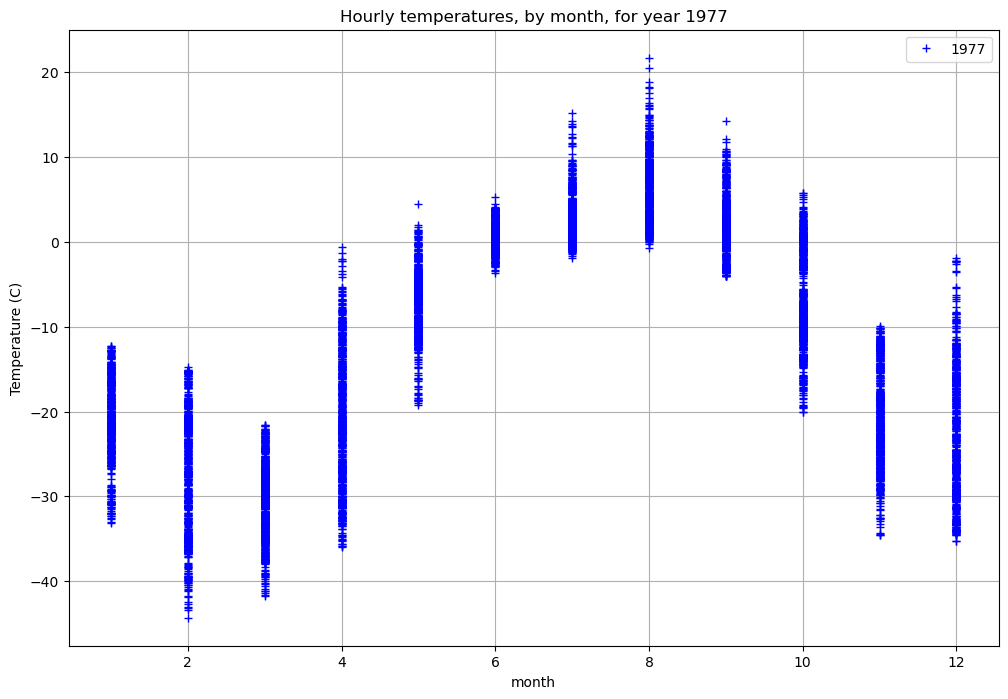

In [12]:
### BEGIN SOLUTION
badindices = df1977[ df1977['temperature'] == -999.9 ].index
print('I am dropping this many missing data points: ', len(badindices))
df1977.drop(badindices,inplace=True)

plt.figure()
plt.plot(df1977['month'], df1977['temperature'], 'b+', label='1977')
plt.xlabel('month')
plt.ylabel('Temperature (C)')
plt.title('Hourly temperatures, by month, for year 1977')
plt.grid()
plt.legend()
### END SOLUTION

### Plotting hourly temperatures on the same graph
You have probably already noticed that it's a bit difficult to compare two datasets unless you graph them together. In the cell below, plot the 1977 and 2024 hourly temperature data on the same graph (still by month), using the black/blue coding you did before and the label/legend method.

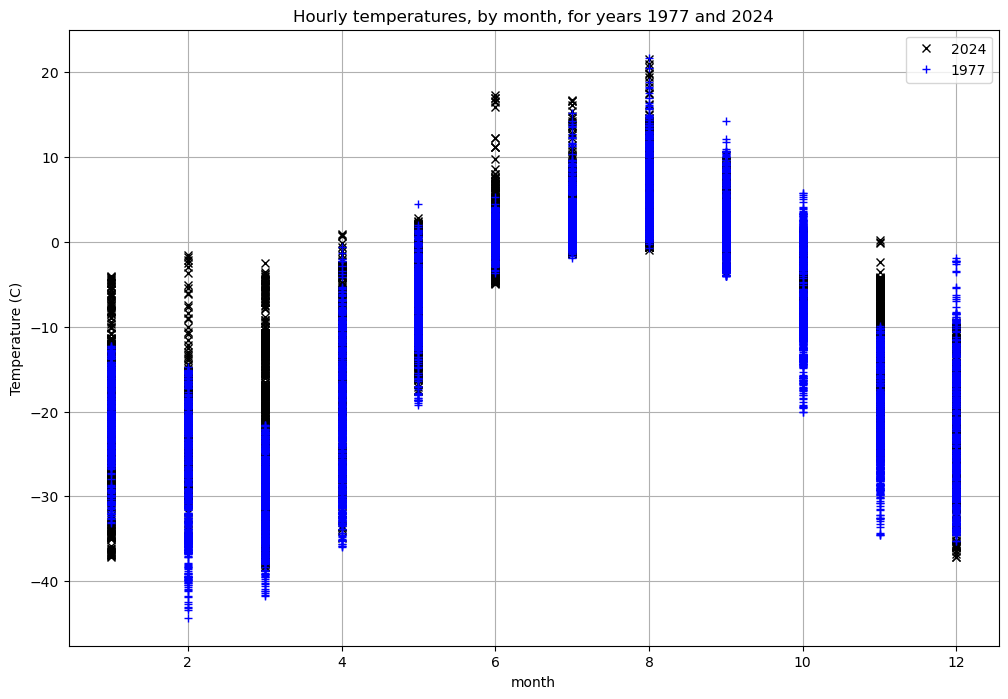

In [14]:
### BEGIN SOLUTION

plt.figure()
plt.plot(df2024['month'], df2024['temperature'], 'kx', label='2024')
plt.plot(df1977['month'], df1977['temperature'], 'b+', label='1977')
plt.xlabel('month')
plt.ylabel('Temperature (C)')
plt.title('Hourly temperatures, by month, for years 1977 and 2024')
plt.grid()
plt.legend()

### END SOLUTION

### Pause for analysis
Take a moment to examine the plot you just made, and use the cell below to record a few observations about the seasonal variation it reveals. 

1. Back in 1977, which two months seem to have been the hottest?
1. Back in 1977, which two month seem to have been the coldest?
1. Although it's not considered "climate" unless one is averaging over (ideally) 30 years, sometimes we look at shorter time periods anyway, because that's the data we have. If you had to choose, which season would  seem to have warmed the more, winter or summer?

### BEGIN SOLUTION

1. July and August were hottest
1. February and March were coldest
1. Warming is most in winter

### END SOLUTION

### Focus on March
The cell below shows how to extract and display hourly temperatures belonging to a particular month of the year (March).

,station,year,month,day,hour,winddirection,windspeed,temperature
1401,BRW,2024,3,1,0,247,2.8,-28.6
1402,BRW,2024,3,1,1,244,2.6,-28.3
1403,BRW,2024,3,1,2,248,3.0,-27.1
1404,BRW,2024,3,1,3,234,2.2,-30.8
1405,BRW,2024,3,1,4,234,2.8,-32.8
...,...,...,...,...,...,...,...,...
2140,BRW,2024,3,31,19,62,7.7,-12.5
2141,BRW,2024,3,31,20,64,7.6,-12.7
2142,BRW,2024,3,31,21,65,8.1,-12.8
2143,BRW,2024,3,31,22,72,7.5,-12.8


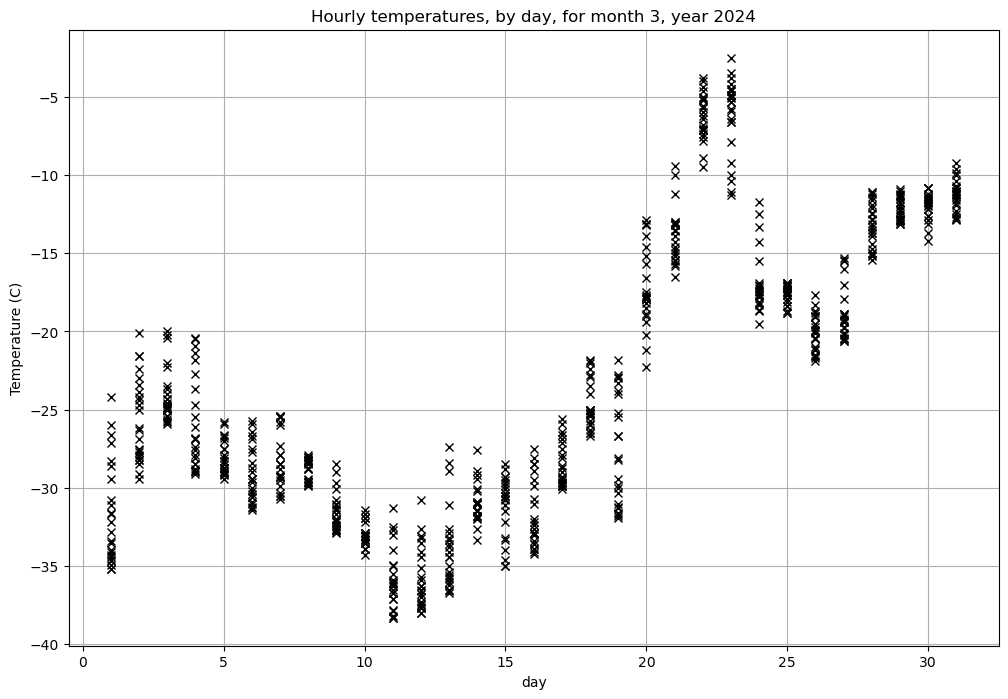

In [18]:
# Specify March as the month we want to focus on
month_of_interest = 3

# Extract data belonging to that month
df2024_month_of_interest = df2024[df2024['month'] == month_of_interest]
display(df2024_month_of_interest) 

# Plot the temperature as a function of day
plt.figure()
plt.plot(df2024_month_of_interest['day'], df2024_month_of_interest['temperature'], 'kx')
plt.title('Hourly temperatures, by day, for month '+str(month_of_interest)+', year 2024')
plt.xlabel('day')
plt.ylabel('Temperature (C)')
plt.grid()

### Your turn
Repeat what we just did, but for 1977. Let's stick with the '+' and 'blue' representation we used before.

,station,year,month,day,hour,winddirection,windspeed,temperature
1417,BRW,1977,3,1,1,350,1.3,-30.0
1418,BRW,1977,3,1,2,300,0.9,-29.4
1419,BRW,1977,3,1,3,35,4.0,-28.8
1420,BRW,1977,3,1,4,7,4.5,-28.9
1421,BRW,1977,3,1,5,353,4.5,-30.2
...,...,...,...,...,...,...,...,...
2132,BRW,1977,3,30,20,60,8.5,-25.2
2133,BRW,1977,3,30,21,58,8.0,-24.1
2134,BRW,1977,3,30,22,53,7.6,-24.3
2135,BRW,1977,3,30,23,50,6.7,-24.4


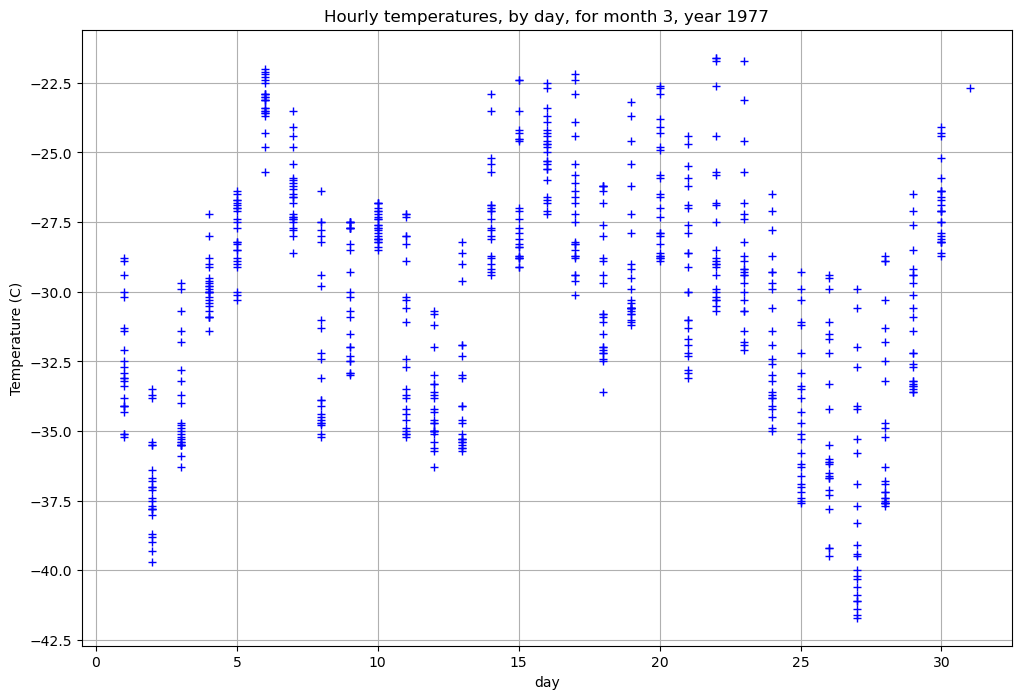

In [20]:
### BEGIN SOLUTION
# Extract data belonging to the month of interest
df1977_month_of_interest = df1977[df1977['month'] == month_of_interest]
display(df1977_month_of_interest) 

# Plotting the data
plt.figure()
plt.plot(df1977_month_of_interest['day'], df1977_month_of_interest['temperature'], 'b+')
plt.title('Hourly temperatures, by day, for month '+str(month_of_interest)+', year 1977')
plt.xlabel('day')
plt.ylabel('Temperature (C)')
plt.grid()
### END SOLUTION

### Probability densities of hourly temperatures
In the foregoing, you might have noticed that it's a little hard to infer trends from visual inspection of a time series. To do that, a useful statistical strategy is to create probability densities of temperature. The cell below uses numpy's "histogram" function to make a probability density for the 2024 dataset.

10
11
10


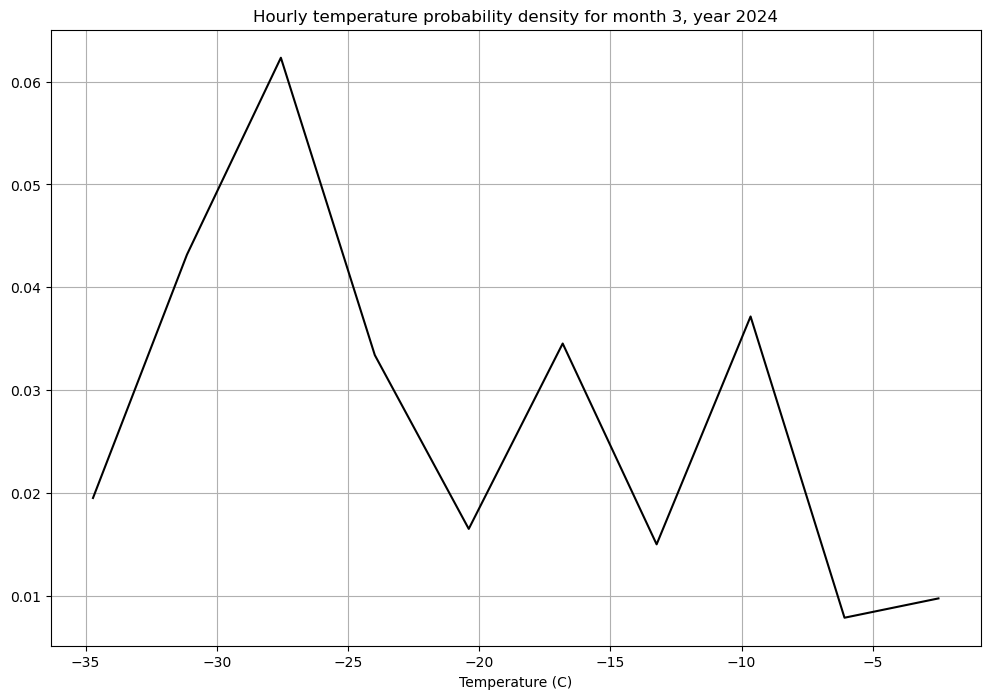

In [22]:
# Get the histogram for the modern dataset
h2024_month_of_interest, e2024_month_of_interest = np.histogram(df2024_month_of_interest['temperature'],density=True)

# Check on some array lengths
print(np.size(h2024_month_of_interest))
print(np.size(e2024_month_of_interest))
print(np.size(e2024_month_of_interest[1:]))

# Plot the histogram 
plt.figure()
plt.plot(e2024_month_of_interest[1:],h2024_month_of_interest,'k')
plt.title('Hourly temperature probability density for month '+str(month_of_interest)+', year 2024')
plt.xlabel('Temperature (C)')
plt.grid()

### Bins and bin edges in a probability density

It's worth pausing for a moment on the meaning of the x-axis in figures like the above. If we see that the peak in a probability density occurs at an x-value of (say) -22, it means that the most probable hourly temperature that month fell within a certain range of -22 degrees C. That range is called a *bin*, and is decided automatically by np.histogram -- in this case, it has decided that each bin should be about three degrees in width, e.g., -22 to -19 degrees. 

You might have noticed a strange notation here too: Why are we specifying e2024_month_of_interest[1:]? The short story is, a set of 10 *bins* requires that we specify 11 *edges* (AKA _bin boundaries_). The "[1:]" leaves off the first edge.

### Your turn
In the cell below, do the following:

1. Calculate the probability density of the 1977 dataset. 
1. Plot both the 2024 and 1977 probability densities on the same graph, with the label/legend method.

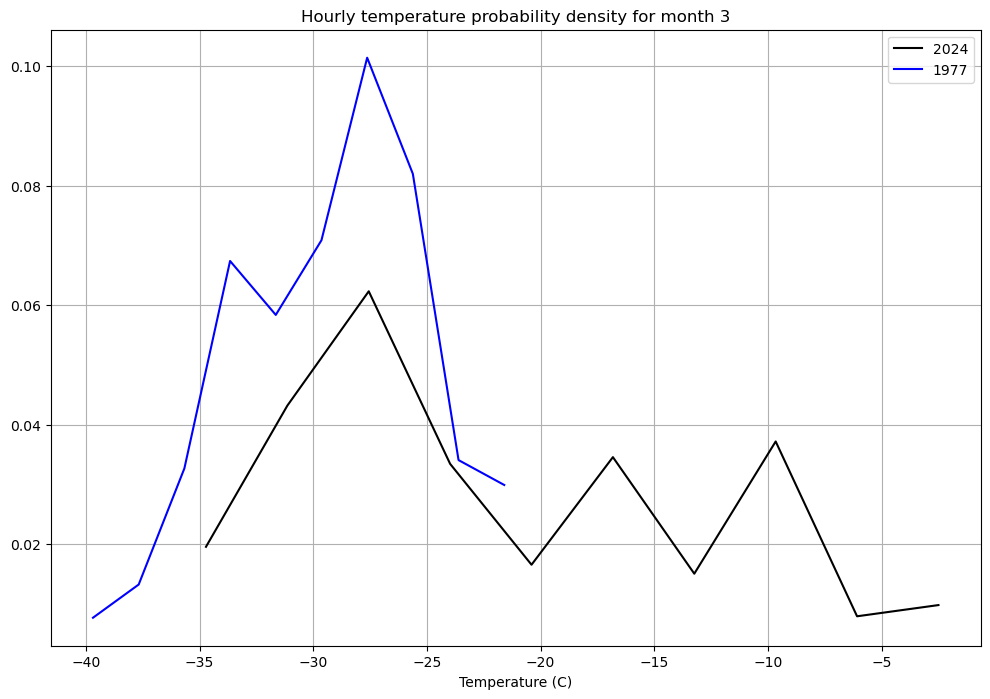

In [24]:
### BEGIN SOLUTION

h1977_month_of_interest, e1977_month_of_interest = np.histogram(df1977_month_of_interest['temperature'],density=True)
plt.figure()
plt.plot(e2024_month_of_interest[1:],h2024_month_of_interest,'k',label='2024')
plt.plot(e1977_month_of_interest[1:],h1977_month_of_interest,'b',label='1977')
plt.title('Hourly temperature probability density for month '+str(month_of_interest))
plt.xlabel('Temperature (C)')
plt.grid()
plt.legend()

### END SOLUTION

### Pause for analysis
Use the cell below to comment on what these data are telling us about climate change in Utqiakvik between the years 1977 and 2024. Key ideas include:
1. The *most-probable temperature* (this is the temperature corresponding to the peak in the distribution)
1. The *spread* (or *range*) of temperatures

### BEGIN SOLUTION

1. The most probable temperature in 2024 is the same as it was in 1977, about -28 degrees
1. Temperatures are much more spread out in 2024

### END SOLUTION

### Combining dataframes from multiple years
Below is an example of how to merge dataframes from multiple years. This will come in handy for building confidence in statistical inferences we can draw from these data.

In [28]:
# Modern data: Here we load four more years of data (2020-2023) as separate dataframes
df2020 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2020.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

df2021 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2021.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

df2022 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2022.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

df2023 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_2023.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

# Now we join them with 2024, and display the result
df2020s = pd.concat( [df2020, df2021, df2022, df2023, df2024])
display(df2020s)

,station,year,month,day,winddirection,windspeed,temperature,hour
0,BRW,2020,1,1,5,7.1,-25.5,NaN
1,BRW,2020,1,1,0,7.0,-25.8,NaN
2,BRW,2020,1,1,3,7.6,-25.3,NaN
3,BRW,2020,1,1,4,7.6,-25.2,NaN
4,BRW,2020,1,1,15,7.5,-25.1,NaN
...,...,...,...,...,...,...,...,...
8718,BRW,2024,12,31,59,7.9,-24.7,19.0
8719,BRW,2024,12,31,59,7.2,-24.7,20.0
8720,BRW,2024,12,31,58,7.3,-24.6,21.0
8721,BRW,2024,12,31,57,7.4,-24.4,22.0


# Your turn
Do the same for 1978 and 1979, and concatenate with 1977. Call the resulting dataframe "df1970s".

In [30]:
### BEGIN SOLUTION
df1978 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_1978.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

df1979 = pd.read_csv('https://gml.noaa.gov/aftp/data/meteorology/in-situ/brw/met_brw_insitu_1_obop_hour_1979.txt', 
                        delimiter=r"\s+",header=None, 
                        usecols=[0,1,2,3,5,6,9], 
                        names=['station','year','month','day','winddirection','windspeed','temperature']) 

# Now join and display the result
df1970s = pd.concat( [df1977, df1978, df1979])
display(df1970s)
### END SOLUTION

,station,year,month,day,hour,winddirection,windspeed,temperature
0,BRW,1977,1,1,0.0,72,6.3,-20.1
1,BRW,1977,1,1,1.0,72,6.3,-20.3
2,BRW,1977,1,1,2.0,70,6.7,-20.5
3,BRW,1977,1,1,3.0,76,6.7,-20.5
4,BRW,1977,1,1,4.0,73,6.7,-20.4
...,...,...,...,...,...,...,...,...
8755,BRW,1979,12,31,NaN,210,3.6,-30.0
8756,BRW,1979,12,31,NaN,210,3.6,-31.5
8757,BRW,1979,12,31,NaN,210,3.6,-31.5
8758,BRW,1979,12,31,NaN,216,3.6,-31.0


### Comparisons
In the cell below, your task is a lot like what you just did, namely to create a probability density of temperatures in March, but using the concatenated dataframes df1970s and df2020s you just created. Plot these two probability densities on the same graph, using the label/legend annotation method.

I am dropping this many missing data points:  188
I am dropping this many missing data points:  2894


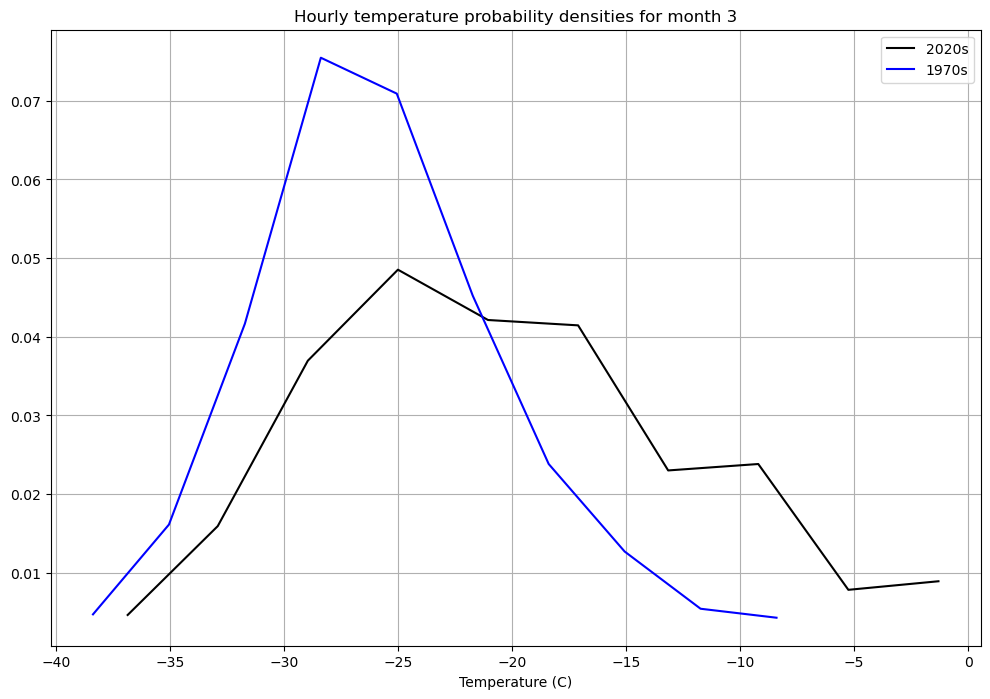

In [32]:
### BEGIN SOLUTION
badindices = df1970s[ df1970s['temperature'] == -999.9 ].index
print('I am dropping this many missing data points: ', len(badindices))
df1970s.drop(badindices,inplace=True)

badindices = df2020s[ df2020s['temperature'] == -999.9 ].index
print('I am dropping this many missing data points: ', len(badindices))
df2020s.drop(badindices,inplace=True)

# Plot the histograms for the month of interest
df2020s_month_of_interest = df2020s[df2020s['month'] == month_of_interest]
df1970s_month_of_interest = df1970s[df1970s['month'] == month_of_interest]
h2020s_month_of_interest, e2020s_month_of_interest = np.histogram(df2020s_month_of_interest['temperature'],density=True)
h1970s_month_of_interest, e1970s_month_of_interest = np.histogram(df1970s_month_of_interest['temperature'],density=True)
plt.figure()
plt.plot(e2020s_month_of_interest[1:],h2020s_month_of_interest,'k',label='2020s')
plt.plot(e1970s_month_of_interest[1:],h1970s_month_of_interest,'b',label='1970s')
plt.title('Hourly temperature probability densities for month '+str(month_of_interest))
plt.xlabel('Temperature (C)')
plt.grid()
plt.legend()

### END SOLUTION

### Pause for analysis
Hopefully, the multi-year probability densities for the month of March that you just got are less noisy (less spiky), and therefore easier to identify trends in, compared to the single-year probability densities you got before. In the space below, comment on any trends you're seeing, focusing (as before) on changes in the most probable temperature and in the spread of temperatures.

### BEGIN SOLUTION

Warming of around 3 degrees Celsius. More spread out now.

### END SOLUTION

### Extensions
Your last task is to extend these ideas to another meteorological variable, namely the *wind direction* data in  the two multi-year dataframes (1970s and 2020s) you've already built. The field to select for is 'winddirection'. 

An important difference to what you did before in temperatures is that the bad data flag for wind direction is -999.0. That is, you can get rid of bad wind direction data using

    badindices = df1970s[ df1970s['winddirection'] == -999.0 ].index
    print('I am dropping this many missing data points: ', len(badindices))
    df1970s.drop(badindices,inplace=True)

(and similarly for your 2020s dataframe).

Once you have those cleaned-up dataframes, select the month of interest (March again), and use np.histogram again to generate probability densities -- one for the 1970s, and another for the 2020s. Then plot the probability densities on the same graph, as we did before, annotating as usual with the label/legend method.

I am dropping this many missing data points:  358
I am dropping this many missing data points:  148


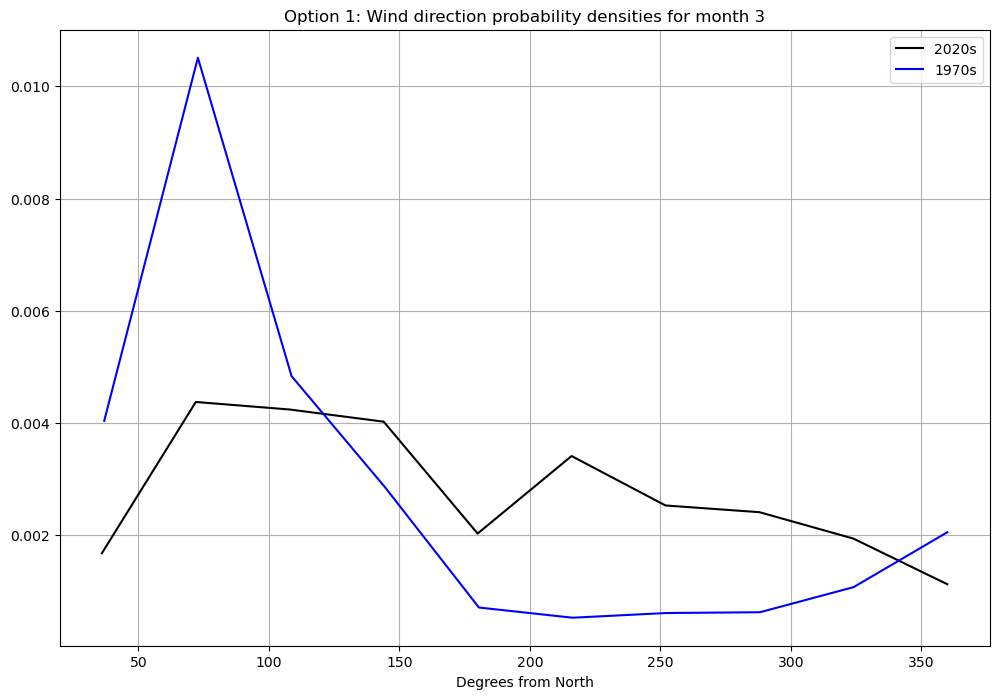

In [36]:
## BEGIN SOLUTION

Option = 1
badindices = df1970s[ df1970s['winddirection'] == -999.0 ].index
print('I am dropping this many missing data points: ', len(badindices))
df1970s.drop(badindices,inplace=True)

badindices = df2020s[ df2020s['winddirection'] == -999.0 ].index
print('I am dropping this many missing data points: ', len(badindices))
df2020s.drop(badindices,inplace=True)

# # Plot the data 
# plt.figure()
# plt.plot(df1970s['month'], df1970s['winddirection'], 'b+', label='1970s')
# plt.plot(df2020s['month'], df2020s['winddirection'], 'kx', label='2020s')
# plt.xlabel('month')
# plt.ylabel('Wind direction')
# plt.title('Time series for years 1970s and 2020s')
# plt.grid()
# plt.legend()

# Plot the histograms
df2020s_month_of_interest = df2020s[df2020s['month'] == month_of_interest]
df1970s_month_of_interest = df1970s[df1970s['month'] == month_of_interest]

h2020s_month_of_interest, e2020s_month_of_interest = np.histogram(df2020s_month_of_interest['winddirection'],density=True)
h1970s_month_of_interest, e1970s_month_of_interest = np.histogram(df1970s_month_of_interest['winddirection'],density=True)

plt.figure()
plt.plot(e2020s_month_of_interest[1:],h2020s_month_of_interest,'k',label='2020s')
plt.plot(e1970s_month_of_interest[1:],h1970s_month_of_interest,'b',label='1970s')
plt.title('Option 1: Wind direction probability densities for month '+str(month_of_interest))
plt.xlabel('Degrees from North')
plt.grid()
plt.legend()

# Option = 2
# badindices = df1970s[ df1970s['windspeed'] == -99.9 ].index
# print('I am dropping this many missing data points: ', len(badindices))
# df1970s.drop(badindices,inplace=True)

# badindices = df2020s[ df2020s['windspeed'] == -999.9 ].index
# print('I am dropping this many missing data points: ', len(badindices))
# df2020s.drop(badindices,inplace=True)

# # Plot the data 
# plt.figure()
# plt.plot(df1970s['month'], df1970s['windspeed'], 'b+', label='1970s')
# plt.plot(df2020s['month'], df2020s['windspeed'], 'kx', label='2020s')
# plt.xlabel('month')
# plt.ylabel('windspeed (m/s)')
# plt.title('Option 2: monthly wind speed probability densities')
# plt.grid()
# plt.legend()

# # Plot the histograms for the entire year
# h2020s, e2020s = np.histogram(df2020s['windspeed'],density=True)
# h1970s, e1970s = np.histogram(df1970s['windspeed'],density=True)
# plt.figure()
# plt.plot(e2020s[1:],h2020s,'k',label='2020s')
# plt.plot(e1970s[1:],h1970s,'b',label='1970s')
# plt.title('Wind speed histograms, annual')
# plt.xlabel('Wind speed (m/s)')
# plt.grid()
# plt.legend()

# # Plot the histograms for a month of interest
# df2020s_month_of_interest = df2020s[df2020s['month'] == month_of_interest]
# df1970s_month_of_interest = df1970s[df1970s['month'] == month_of_interest]
# h2020s_month_of_interest, e2020s_month_of_interest = np.histogram(df2020s_month_of_interest['windspeed'],density=True)
# h1970s_month_of_interest, e1970s_month_of_interest = np.histogram(df1970s_month_of_interest['windspeed'],density=True)
# plt.figure()
# plt.plot(e2020s_month_of_interest[1:],h2020s_month_of_interest,'k',label='2020s')
# plt.plot(e1970s_month_of_interest[1:],h1970s_month_of_interest,'b',label='1970s')
# plt.title('Wind speed histograms for month '+str(month_of_interest))
# plt.xlabel('Wind speed (m/s)')
# plt.grid()
# plt.legend()

### END SOLUTION

### Pause for analysis
Wind direction in these datasets is specified as where wind is coming from, in degrees from north:

- a wind direction of zero degrees => wind is coming from the north
- a wind direction of 90 degrees => wind is coming from the east
- a wind direction of 180 degrees => wind is coming from the south
- a wind direction of 270 degrees => wind is coming from the west

Given that, describe any trends you see in how wind direction was different in the 2020s compared to the 1970s, focusing as before on the most probable wind direction and the spread of wind directions.

### BEGIN SOLUTION

Winds nowadays in Utqiakvik (in March) are still most probably coming from about 70 degrees (i.e., almost from the east). But the spread of wind directions is much greater.

### END SOLUTION

### Refresh/save/validate
Double-check everything is OK, and press the "Validate" button (as usual).

### Close/submit/logout
Close, submit, and log out.